# K-Means and Agglomerative Clustering - 

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score

## Load Data

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2\dailykos.csv')
data.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


# K-means

In [3]:
def kmeans(n_clusters):
    kmeans = KMeans(n_clusters)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    silhoutte = silhouette_score(data, kmeans.labels_, metric='euclidean')
    return wcss_iter, silhoutte

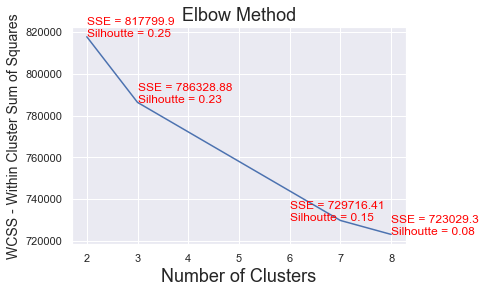

In [4]:
wcss = []
silhoutte = []
for i in [2,3,7,8]:
    wcss.append(kmeans(n_clusters = i)[0])
    silhoutte.append(kmeans(n_clusters = i)[1])
    
plt.plot([2,3,7,8], wcss)
plt.title('Elbow Method',size = 18)
plt.ylabel('WCSS - Within Cluster Sum of Squares', size = 14)
plt.xlabel('Number of Clusters', size = 18)
plt.annotate('SSE = '+str(round(wcss[0],2))+'\nSilhoutte = '+str(round(silhoutte[0],2)) , (2,wcss[0]), c='red')
plt.annotate('SSE = '+str(round(wcss[1],2))+'\nSilhoutte = '+str(round(silhoutte[1],2)), (3,wcss[1]), c='red')
plt.annotate('SSE = '+str(round(wcss[2],2))+'\nSilhoutte = '+str(round(silhoutte[2],2)), (6,wcss[2]), c='red')
plt.annotate('SSE = '+str(round(wcss[3],2))+'\nSilhoutte = '+str(round(silhoutte[3],2)), (8,wcss[3]), c='red')
plt.show()

# Agglomerative Clustering

In [5]:
from sklearn.cluster import AgglomerativeClustering

## SSE

In [6]:
import math
SSE = []
for i in [2,3,7,8]:
    agg = AgglomerativeClustering(n_clusters=i,  affinity='euclidean', linkage='ward')
    agg.fit(data)
    clusters = agg.fit_predict(data)
    data['Clusters'] = clusters
    
    def find_centroids(data, clusters):
    
        lst = []
        for i in range(0, clusters.max()+1):
            lst.append(np.mean(data[data['Clusters'] == i]))
        return np.vstack(lst)

    centroids = find_centroids(data, clusters )
    wcs = []
    for j in range(0, centroids.shape[0]):
        wcs.append(sum(((data[data['Clusters'] == j] - centroids[j])**2).sum()))
    SSE.append(sum(wcs))
    

In [7]:
print('For k=2, SSE = ',SSE[0],'\nFor k=3, SSE = ',SSE[1],'\nFor k=7, SSE = ',SSE[2],'\nFor k=8, SSE = ',SSE[3])

For k=2, SSE =  820643.8663618005 
For k=3, SSE =  801212.0064392118 
For k=7, SSE =  753715.2484661144 
For k=8, SSE =  744498.0606257359


## Silhoutte

In [8]:
def agglomerativeClustering(n_clusters):
    agg = AgglomerativeClustering(n_clusters,  affinity='euclidean', linkage='ward')
    agg.fit(data)
    silhoutte = silhouette_score(data, agg.labels_, metric='euclidean')
    return silhoutte

In [9]:
silhoutte = []
for i in [2,3,7,8]:
    silhoutte.append(agglomerativeClustering(n_clusters = i))

In [10]:
print('For k=2, Silhoutte = ',silhoutte[0],'\nFor k=3, Silhoutte = ',silhoutte[1],'\nFor k=7, Silhoutte = ',silhoutte[2],'\nFor k=8, Silhoutte = ',silhoutte[3])

For k=2, Silhoutte =  0.23074173122819394 
For k=3, Silhoutte =  0.13325022543325735 
For k=7, Silhoutte =  0.07716602077164508 
For k=8, Silhoutte =  0.08135029651501606


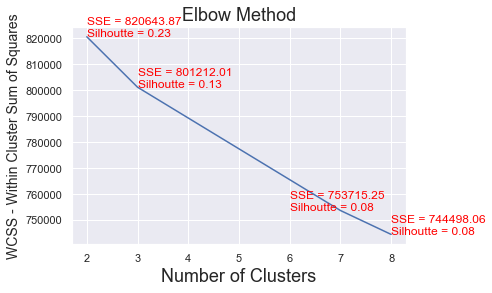

In [11]:
plt.plot([2,3,7,8], SSE)
plt.title('Elbow Method',size = 18)
plt.ylabel('WCSS - Within Cluster Sum of Squares', size = 14)
plt.xlabel('Number of Clusters', size = 18)
plt.annotate('SSE = '+str(round(SSE[0],2))+'\nSilhoutte = '+str(round(silhoutte[0],2)) , (2,SSE[0]), c='red')
plt.annotate('SSE = '+str(round(SSE[1],2))+'\nSilhoutte = '+str(round(silhoutte[1],2)), (3,SSE[1]), c='red')
plt.annotate('SSE = '+str(round(SSE[2],2))+'\nSilhoutte = '+str(round(silhoutte[2],2)), (6,SSE[2]), c='red')
plt.annotate('SSE = '+str(round(SSE[3],2))+'\nSilhoutte = '+str(round(silhoutte[3],2)), (8,SSE[3]), c='red')
plt.show()

# K-Means

## Optimal Number of Clusters

In [12]:
from kneed import KneeLocator

In [13]:
wcss = []
silhoutte = []
for i in range(2,11):
    wcss.append(kmeans(n_clusters = i)[0])
    silhoutte.append(kmeans(n_clusters = i)[1])


In [14]:
kl = KneeLocator(range(2,11), wcss, curve="convex", direction="decreasing")
kl.elbow

5

### Optimal Number of clusters is k=5

## Clusters with Max and Min number of data

In [15]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data)
clusters = kmeans.fit_predict(data)
data['Clusters'] = clusters

In [16]:
cluster_size = {}
for i in range(0, clusters.max()+1):
    cluster_size['Cluster',i] = data[data['Clusters'] == i].shape[0]

In [17]:
cluster_size

{('Cluster', 0): 494,
 ('Cluster', 1): 260,
 ('Cluster', 2): 2182,
 ('Cluster', 3): 331,
 ('Cluster', 4): 163}

In [18]:
min(cluster_size.values())

163

In [19]:
max(cluster_size.values())

2182

## Import to CSV

- its a good practice to analyse each cluster individually and to understand what makes each cluster unique
- we can use EXCEL/POWERBI/SQL/PYTHON for that

In [20]:
import pandasql as ps
def sql(query):
    return ps.sqldf(query)

In [21]:
query = '''SELECT *
            FROM data
            WHERE "Clusters" = 0'''

data0 = sql(query).to_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2/cluster0.csv')

In [22]:
query = '''SELECT *
            FROM data
            WHERE "Clusters" = 1'''

data1 = sql(query).to_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2/cluster1.csv')

In [23]:
query = '''SELECT *
            FROM data
            WHERE "Clusters" = 2'''

data2 = sql(query).to_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2/cluster2.csv')

In [24]:
query = '''SELECT *
            FROM data
            WHERE "Clusters" = 3'''

data3 = sql(query).to_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2/cluster3.csv')

In [25]:
query = '''SELECT *
            FROM data
            WHERE "Clusters" = 4'''

data4 = sql(query).to_csv('C:/Users/user/Desktop/Data Science/אוניברסיטה/שנה ד/סמסטר א/כריית נתונים/Task 2/cluster4.csv')

In [32]:
# Dendrogram to choose number of clusters (k)
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(1)
z = linkage(data, method = 'ward')
dendrogram = dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Words')
plt.ylabel('Euclidean distances')
plt.show()

In [52]:
def agglomerativeClustering(data, method):
    agg = AgglomerativeClustering(n_clusters = 5,  affinity='euclidean', linkage=method)
    agg.fit(data)
    plt.figure(1)
    z = linkage(data, method = method)
    dendro = dendrogram(z, p = 5, truncate_mode='level')
    plt.title('Dendrogram')
    plt.xlabel('Words')
    plt.ylabel('Euclidean distances')
    plt.show()


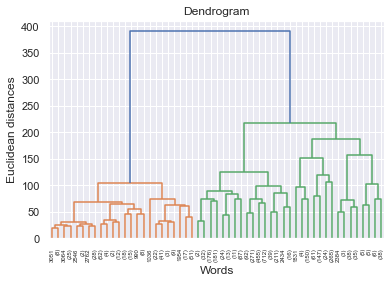

In [53]:
agglomerativeClustering(data,method = 'ward')

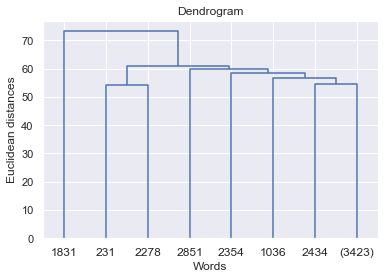

In [54]:
agglomerativeClustering(data,method = 'average')

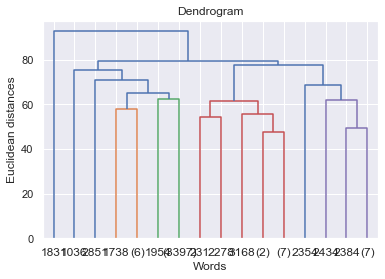

In [55]:
agglomerativeClustering(data,method = 'complete')

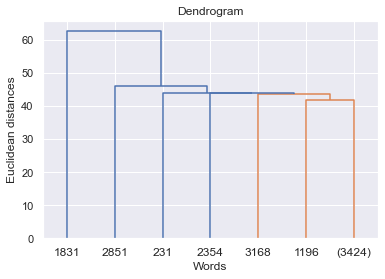

In [56]:
agglomerativeClustering(data,method = 'single')